### lab2

#### 1.首先尝试利用panda库进行词频统计

In [51]:
import jieba
import os
import pandas as pd

def load_stopwords(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        return set(line.strip() for line in f)


In [52]:
def process_texts_with_pandas(folder, stopwords):
    all_words = []
    for i in range(1, 21):
        filepath = os.path.join(folder, f"{i}.txt")
        if os.path.exists(filepath):
            with open(filepath, "r", encoding="utf-8") as f:
                text = f.read()
                words = jieba.cut(text)
                filtered_words = [w for w in words if w not in stopwords and len(w) > 1]
                all_words.extend(filtered_words)

    # 使用 pandas DataFrame 统计词频
    word_series = pd.Series(all_words)
    word_count = word_series.value_counts()  # 统计词频
    return word_count


In [53]:
if __name__ == "__main__":
    folder = "./dataset"  # 文本文件所在目录
    stopwords_file = "cn_stopwords.txt"  # 停用词文件

    stopwords = load_stopwords(stopwords_file)
    word_count = process_texts_with_pandas(folder, stopwords)

    # 输出前100个高频词
    print("Top 100 words by frequency:")
    print(word_count.head(100))

Top 100 words by frequency:
中国      459
中方      321
发展      244
记者      187
合作      184
       ... 
2022     33
坚决       33
促进       33
保持       33
太平洋      33
Name: count, Length: 100, dtype: int64


#### 2.作出matploit库下的静态词云

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 读取停用词
def load_stopwords(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        return set(line.strip() for line in f)

# 读取文本并分词
def process_texts(folder, stopwords):
    documents = []  # 存储多个文档
    for i in range(1, 21):
        filepath = os.path.join(folder, f"{i}.txt")
        if os.path.exists(filepath):
            with open(filepath, "r", encoding="utf-8") as f:
                text = f.read()
                words = jieba.cut(text)
                filtered_words = [w for w in words if w not in stopwords and len(w) > 1]
                documents.append(" ".join(filtered_words))  # 每个文档存为一个字符串
    return documents  # 返回文档列表


In [64]:
# 计算TF-IDF
def compute_tfidf(docs):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(docs)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1
    tfidf_dict = dict(zip(feature_names, tfidf_scores))
    return dict(sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:100])  # 取前100个

In [65]:
# 生成词云
def generate_wordcloud(tfidf_dict):
    wordcloud = WordCloud(
        font_path="msyh.ttf",  # 设置字体路径
        background_color="#FFF5EE",  # 背景颜色
        width=800,  # 宽度
        height=600,  # 高度
        prefer_horizontal=1,  # 设置为0确保所有词都朝上
        max_words=100,  # 词云显示的最大词数
        max_font_size=100,  # 最大字体大小
        min_font_size=10,  # 最小字体大小
        contour_color='black',  # 边框颜色
        contour_width=1  # 边框宽度
    )
    wordcloud.generate_from_frequencies(tfidf_dict)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

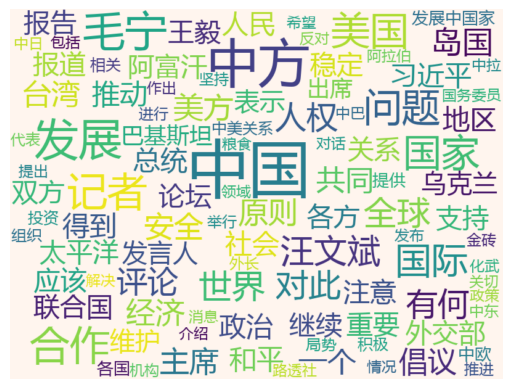

TF-IDF Top 100 words:
中国: 4.0481
中方: 2.7752
发展: 1.9191
毛宁: 1.8098
合作: 1.6080
记者: 1.6080
美国: 1.4854
国家: 1.4598
问题: 1.4441
国际: 1.3010
汪文斌: 1.0776
世界: 1.0745
全球: 1.0576
对此: 1.0169
人权: 0.9565
有何: 0.9516
评论: 0.9201
岛国: 0.9068
美方: 0.8649
主席: 0.8421
安全: 0.8276
经济: 0.8205
原则: 0.8049
一个: 0.7858
共同: 0.7827
倡议: 0.7691
台湾: 0.7655
推动: 0.7124
习近平: 0.6945
总统: 0.6830
得到: 0.6798
社会: 0.6708
政治: 0.6698
和平: 0.6596
地区: 0.6585
继续: 0.6407
论坛: 0.6263
报告: 0.6154
关系: 0.6134
报道: 0.6057
阿富汗: 0.6013
人民: 0.5964
支持: 0.5829
应该: 0.5789
双方: 0.5721
联合国: 0.5665
重要: 0.5665
太平洋: 0.5592
稳定: 0.5559
外交部: 0.5534
各方: 0.5526
注意: 0.5418
王毅: 0.5353
乌克兰: 0.5292
发言人: 0.5237
表示: 0.5189
维护: 0.5114
巴基斯坦: 0.4929
出席: 0.4896
发展中国家: 0.4880
各国: 0.4878
中欧: 0.4839
提供: 0.4825
中美关系: 0.4792
组织: 0.4788
相关: 0.4771
积极: 0.4722
投资: 0.4684
局势: 0.4684
国务委员: 0.4566
代表: 0.4556
希望: 0.4506
路透社: 0.4443
举行: 0.4420
反对: 0.4382
发布: 0.4376
情况: 0.4373
中拉: 0.4369
中东: 0.4361
介绍: 0.4348
提出: 0.4342
对话: 0.4339
中日: 0.4327
进行: 0.4292
消息: 0.4287
金砖: 0.4267
机构: 0.4227
化武:

In [67]:
if __name__ == "__main__":
    folder = "./dataset"  # 文本文件所在目录
    stopwords_file = "cn_stopwords.txt"  # 停用词文件

    stopwords = load_stopwords(stopwords_file)
    all_text = process_texts(folder, stopwords)
    tfidf_dict = compute_tfidf(all_text)
    generate_wordcloud(tfidf_dict)

    # 输出前100个词
    print("TF-IDF Top 100 words:")
    for word, score in tfidf_dict.items():
        print(f"{word}: {score:.4f}")


#### 3.利用pyecharts作出基于HTML的可交互词云

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pyecharts.charts import WordCloud as PyechartsWordCloud
from pyecharts import options as opts

# 读取停用词
def load_stopwords(filepath):
    with open(filepath, "r", encoding="utf-8") as f:
        return set(line.strip() for line in f)

# 读取文本并分词
def process_texts(folder, stopwords):
    documents = []  # 存储多个文档
    for i in range(1, 21):
        filepath = os.path.join(folder, f"{i}.txt")
        if os.path.exists(filepath):
            with open(filepath, "r", encoding="utf-8") as f:
                text = f.read()
                words = jieba.cut(text)
                filtered_words = [w for w in words if w not in stopwords and len(w) > 1]
                documents.append(" ".join(filtered_words))  # 每个文档存为一个字符串
    return documents  # 返回文档列表


In [2]:
# 计算TF-IDF
def compute_tfidf(docs):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(docs)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1  # 计算所有文档的TF-IDF总和
    tfidf_dict = dict(zip(feature_names, tfidf_scores))
    return dict(sorted(tfidf_dict.items(), key=lambda x: x[1], reverse=True)[:100])  # 取前100个

In [3]:
# 生成pyecharts词云
def generate_pyecharts_wordcloud(tfidf_dict, output_file="wordcloud.html"):
    word_freq_list = list(tfidf_dict.items())  # 转换为 (词, 频率) 列表
    wordcloud = (
        PyechartsWordCloud()
        .add(
            "",
            word_freq_list,
            word_size_range=[20, 100],  # 调整词大小范围
            shape="diamond",
            rotate_step=45,
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="TF-IDF 词云", subtitle="基于文本的词频统计", title_textstyle_opts=opts.TextStyleOpts(font_size=20)),
            tooltip_opts=opts.TooltipOpts(is_show=True),  # 鼠标悬停提示
        )
    )
    wordcloud.set_series_opts(
        label_opts=opts.LabelOpts(
            font_size=15,  # 设置标签的字体大小
            font_weight="bold",  # 设置标签的字体粗细
            color="rgba(0, 0, 0, 0.7)",  # 设置标签颜色
        )
    )
    wordcloud.set_colors(["#FF6347", "#FFD700", "#32CD32", "#00BFFF", "#8A2BE2", "#DC143C", "#FF1493", "#FF4500"])  # 自定义颜色
    wordcloud.render(output_file)  # 生成 HTML 文件
    print(f"词云已保存为 {output_file}")

In [4]:
if __name__ == "__main__":
    folder = "./dataset"  # 文本文件所在目录
    stopwords_file = "cn_stopwords.txt"  # 停用词文件

    stopwords = load_stopwords(stopwords_file)
    all_text = process_texts(folder, stopwords)
    tfidf_dict = compute_tfidf(all_text)

    # 输出前100个词
    print("TF-IDF Top 100 words:")
    for word, score in tfidf_dict.items():
        print(f"{word}: {score:.4f}")

    # 生成pyecharts词云
    generate_pyecharts_wordcloud(tfidf_dict)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\23162\AppData\Local\Temp\jieba.cache
Loading model cost 0.666 seconds.
Prefix dict has been built successfully.


TF-IDF Top 100 words:
中国: 4.0481
中方: 2.7752
发展: 1.9191
毛宁: 1.8098
合作: 1.6080
记者: 1.6080
美国: 1.4854
国家: 1.4598
问题: 1.4441
国际: 1.3010
汪文斌: 1.0776
世界: 1.0745
全球: 1.0576
对此: 1.0169
人权: 0.9565
有何: 0.9516
评论: 0.9201
岛国: 0.9068
美方: 0.8649
主席: 0.8421
安全: 0.8276
经济: 0.8205
原则: 0.8049
一个: 0.7858
共同: 0.7827
倡议: 0.7691
台湾: 0.7655
推动: 0.7124
习近平: 0.6945
总统: 0.6830
得到: 0.6798
社会: 0.6708
政治: 0.6698
和平: 0.6596
地区: 0.6585
继续: 0.6407
论坛: 0.6263
报告: 0.6154
关系: 0.6134
报道: 0.6057
阿富汗: 0.6013
人民: 0.5964
支持: 0.5829
应该: 0.5789
双方: 0.5721
联合国: 0.5665
重要: 0.5665
太平洋: 0.5592
稳定: 0.5559
外交部: 0.5534
各方: 0.5526
注意: 0.5418
王毅: 0.5353
乌克兰: 0.5292
发言人: 0.5237
表示: 0.5189
维护: 0.5114
巴基斯坦: 0.4929
出席: 0.4896
发展中国家: 0.4880
各国: 0.4878
中欧: 0.4839
提供: 0.4825
中美关系: 0.4792
组织: 0.4788
相关: 0.4771
积极: 0.4722
投资: 0.4684
局势: 0.4684
国务委员: 0.4566
代表: 0.4556
希望: 0.4506
路透社: 0.4443
举行: 0.4420
反对: 0.4382
发布: 0.4376
情况: 0.4373
中拉: 0.4369
中东: 0.4361
介绍: 0.4348
提出: 0.4342
对话: 0.4339
中日: 0.4327
进行: 0.4292
消息: 0.4287
金砖: 0.4267
机构: 0.4227
化武:

In [62]:
# *debug*
# if __name__ == "__main__":
#     folder = "./dataset"  # 文本文件所在目录
#     stopwords_file = "cn_stopwords.txt"  # 停用词文件
#
#     stopwords = load_stopwords(stopwords_file)
#     all_text = process_texts(folder, stopwords)
#     tfidf_dict = compute_tfidf(all_text)
#
#     # 输出前100个词
#     print("TF-IDF Top 100 words:")
#     for word, score in tfidf_dict.items():
#         print(f"{word}: {score:.4f}")
#
#     # 生成Matplotlib词云
#     generate_wordcloud(tfidf_dict)
#
#     # 生成pyecharts词云
#     generate_pyecharts_wordcloud(tfidf_dict)